In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns   
import warnings
warnings.filterwarnings("ignore")
import missingno as ms

# use cyperpunk theme for more interesting visualization
import mplcyberpunk
plt.style.use("cyberpunk")

In [2]:
# read the data
df = pd.read_excel("../data/oil_data/Chapter 5/Logistic Regression (LR)/Chapter5_HR_DataSet.xlsx")

In [3]:
df.head()

,Late show up percentage,Project initiative percentage,Percentage of project delivery on time,Percentage of emails exchanged,Percentage of responsiveness,Percentage of professional email response,Percentage of sharing ideas,Percentage of helping colleagues,Percentage of entrepreneurial posts on LinkedIn,Percentage of Facebook comments,Quitting
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767,1
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091,0
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970,0
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326,1
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Late show up percentage                          1000 non-null   float64
 1   Project initiative percentage                    1000 non-null   float64
 2   Percentage of project delivery on time           1000 non-null   float64
 3   Percentage of emails exchanged                   1000 non-null   float64
 4   Percentage of responsiveness                     1000 non-null   float64
 5   Percentage of professional email response        1000 non-null   float64
 6   Percentage of sharing ideas                      1000 non-null   float64
 7   Percentage of helping colleagues                 1000 non-null   float64
 8   Percentage of entrepreneurial posts on LinkedIn  1000 non-null   float64
 9   Percentage of Facebook comments

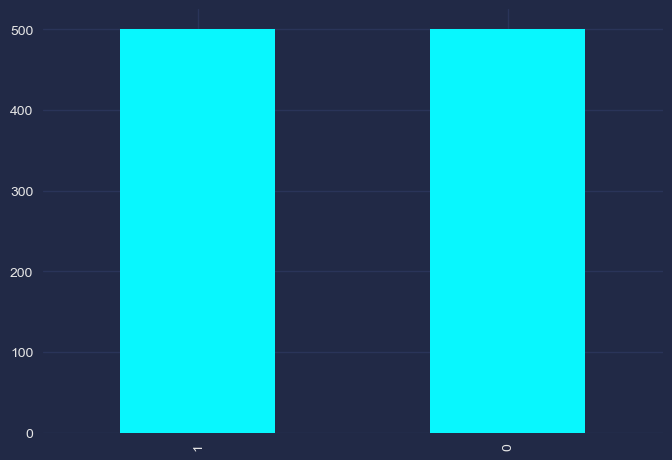

In [5]:
df["Quitting"].value_counts().plot.bar();

<Figure size 4000x3000 with 0 Axes>

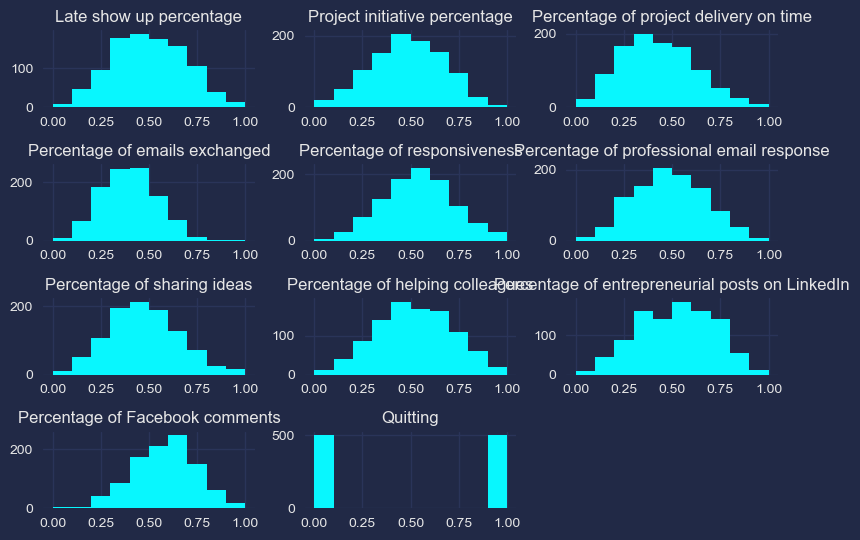

In [6]:
# show the freature distriutions
plt.figure(figsize=(20,15),dpi=200)
df.hist();
plt.tight_layout();

<AxesSubplot:>

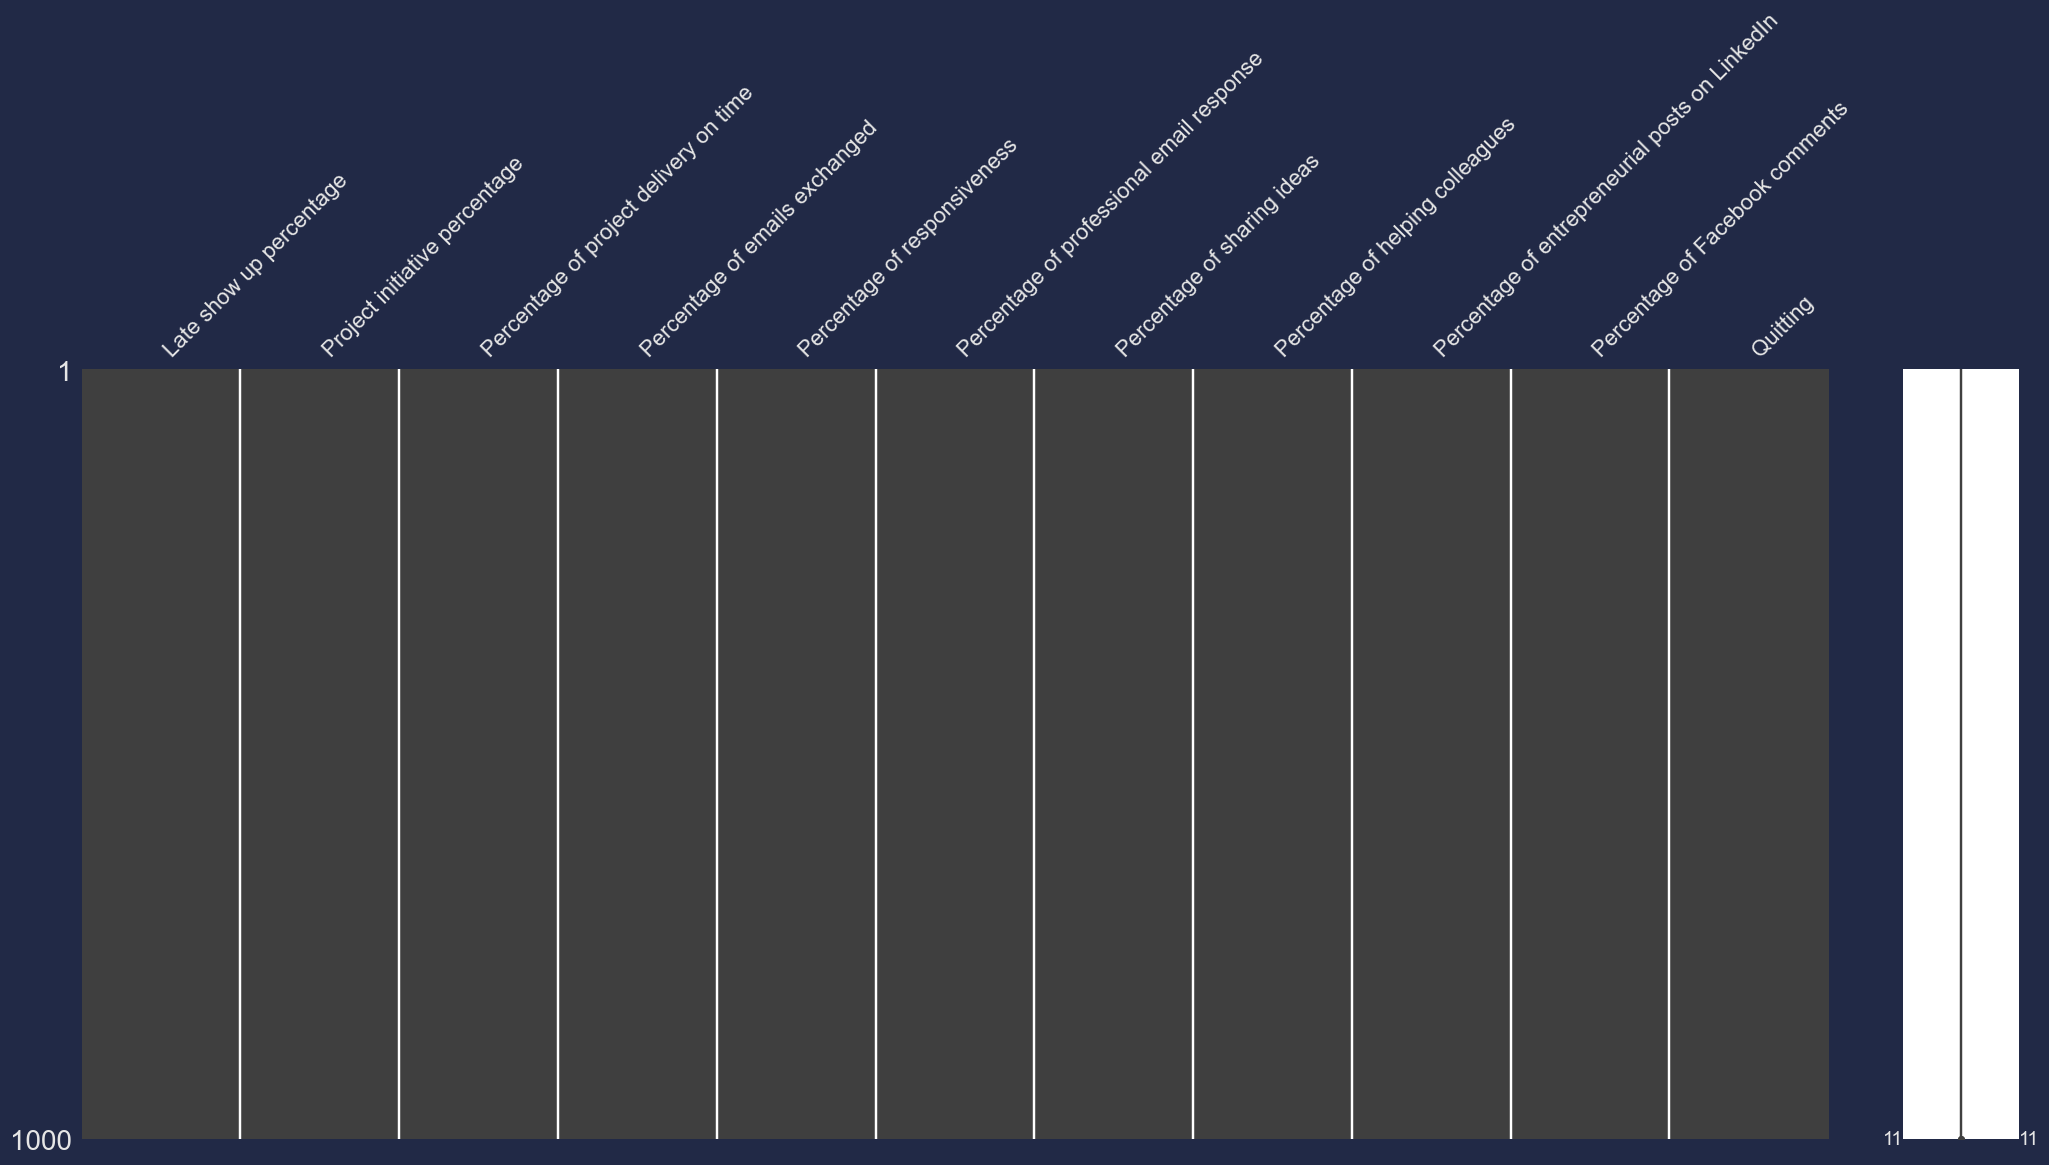

In [7]:
# have a look at missing data
ms.matrix(df)

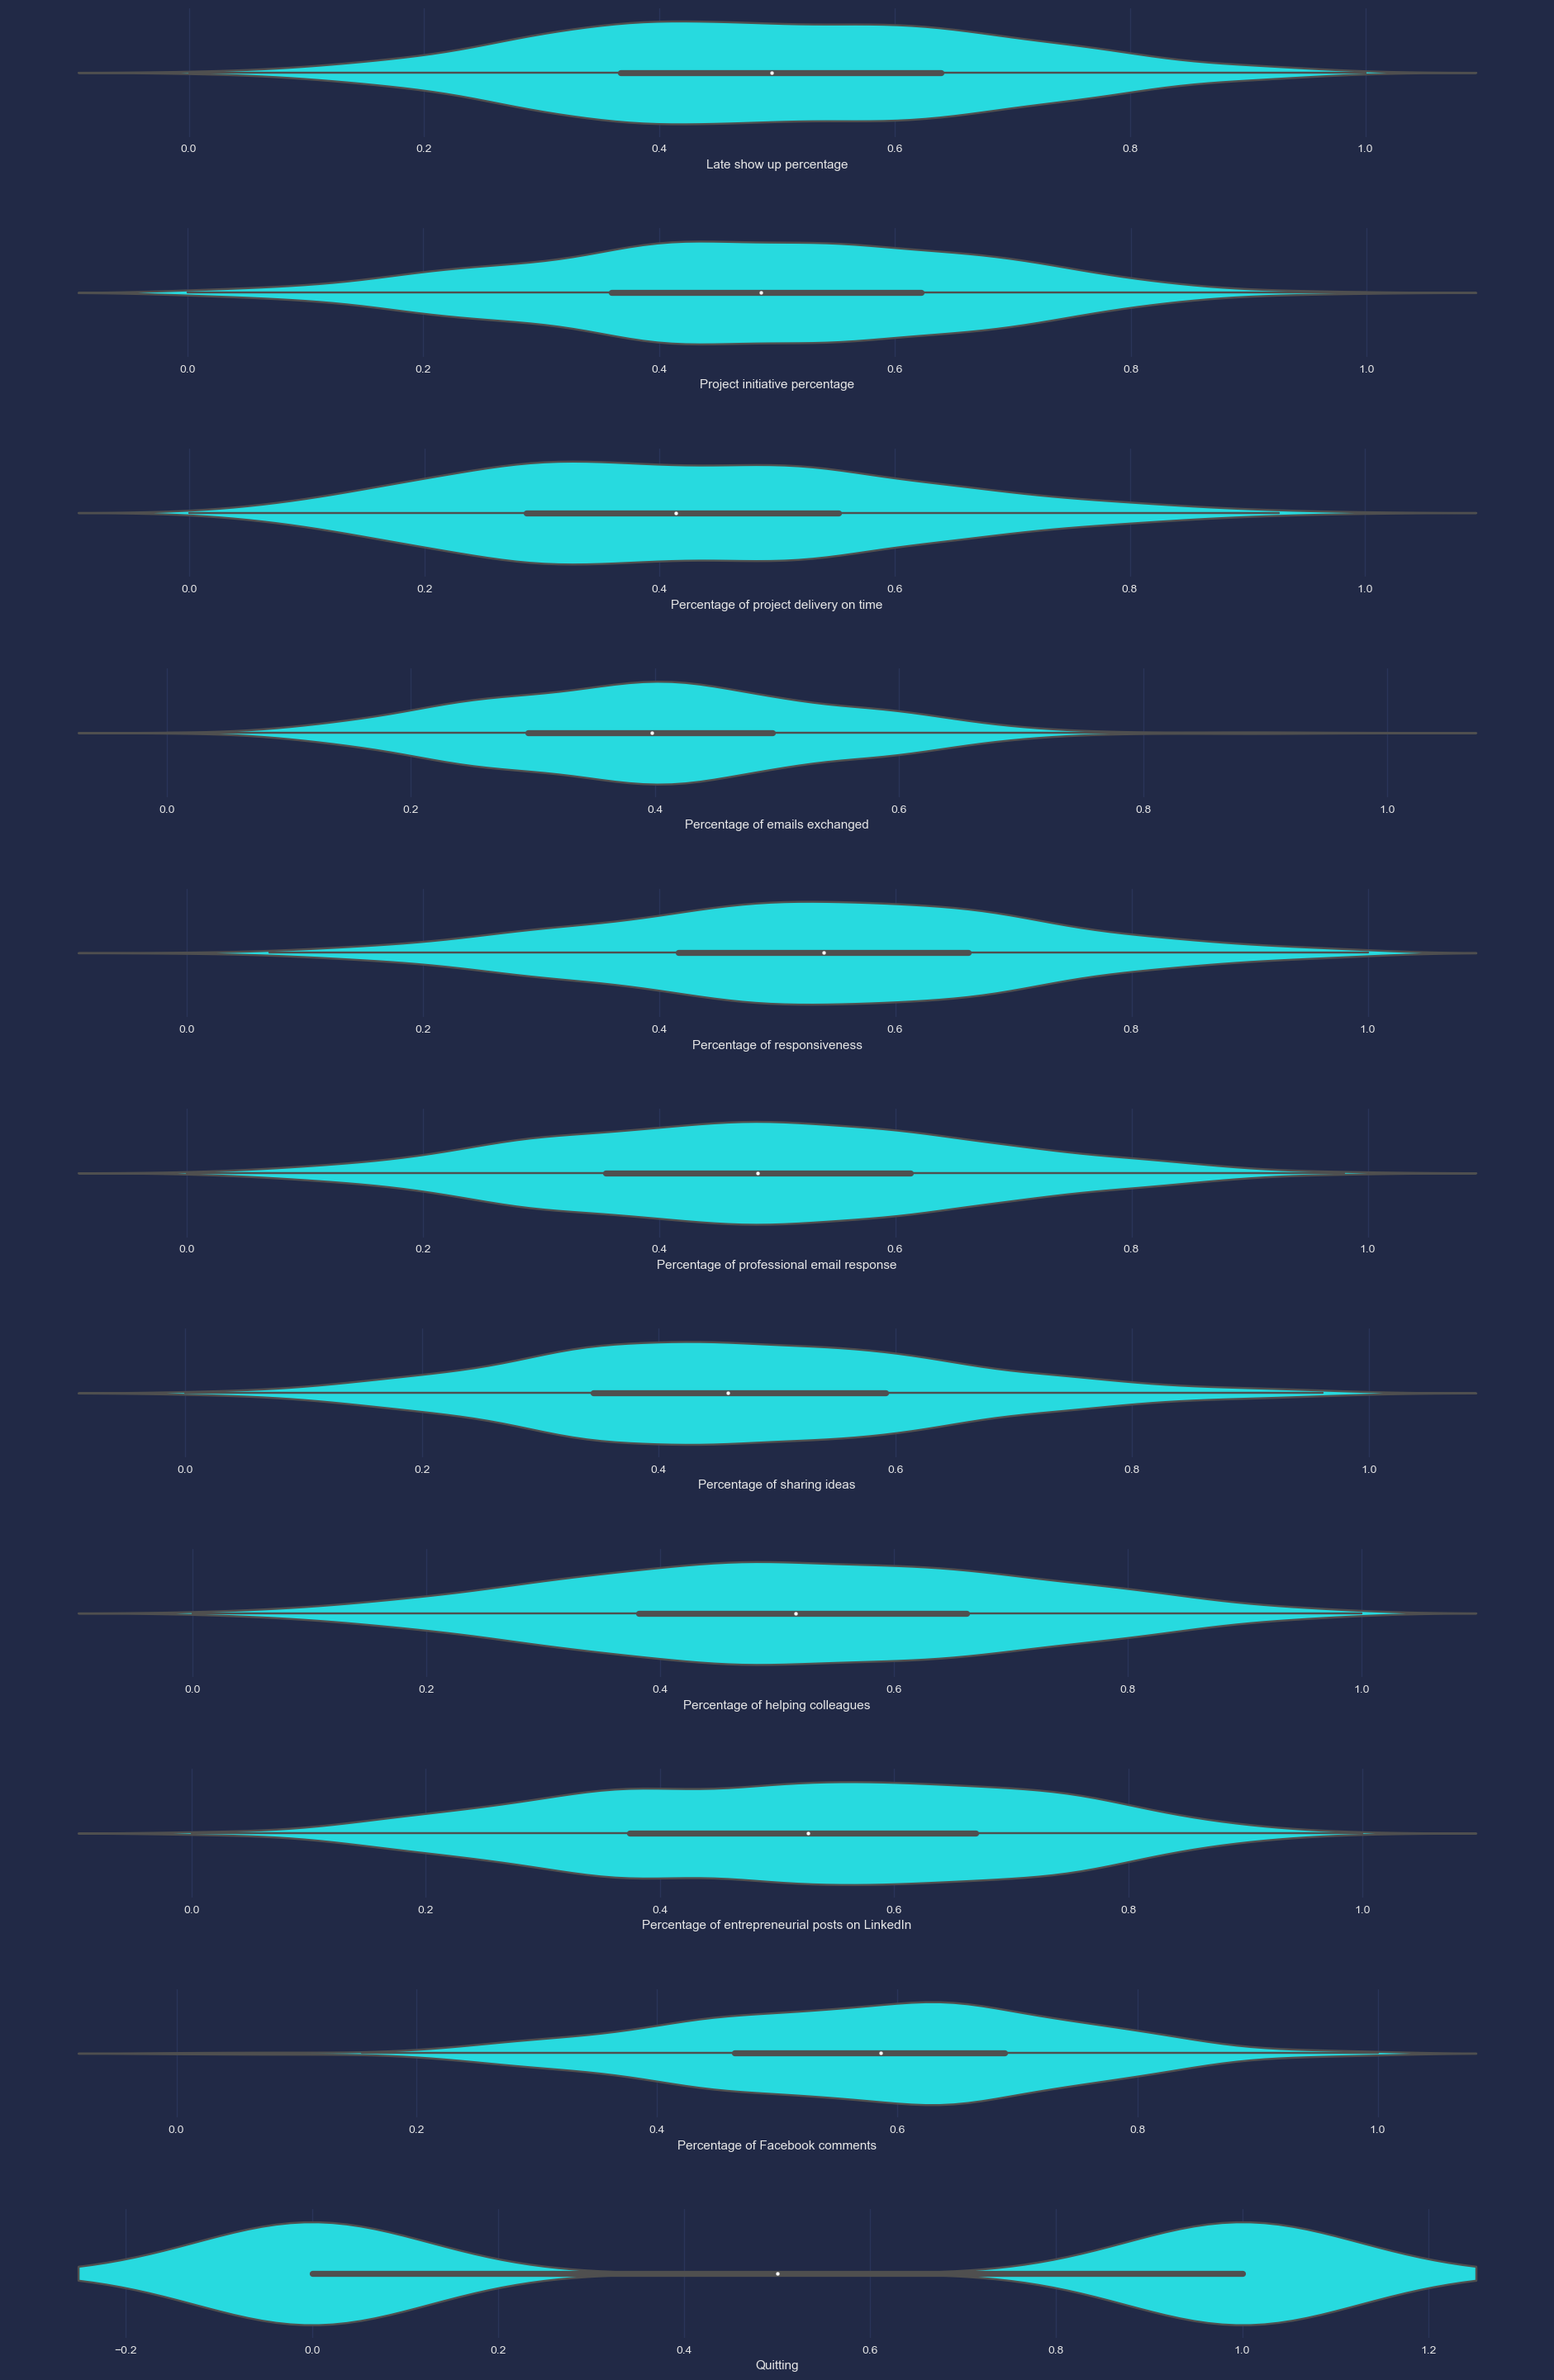

In [8]:
#
plt.figure(figsize=(20,30))
for i,col in enumerate(df.columns):
    plt.subplot(len(df.columns),1,i+1)
    sns.violinplot(df[col])
    
    
plt.tight_layout(pad=5)

#### Show linear relationship between variables

<AxesSubplot:>

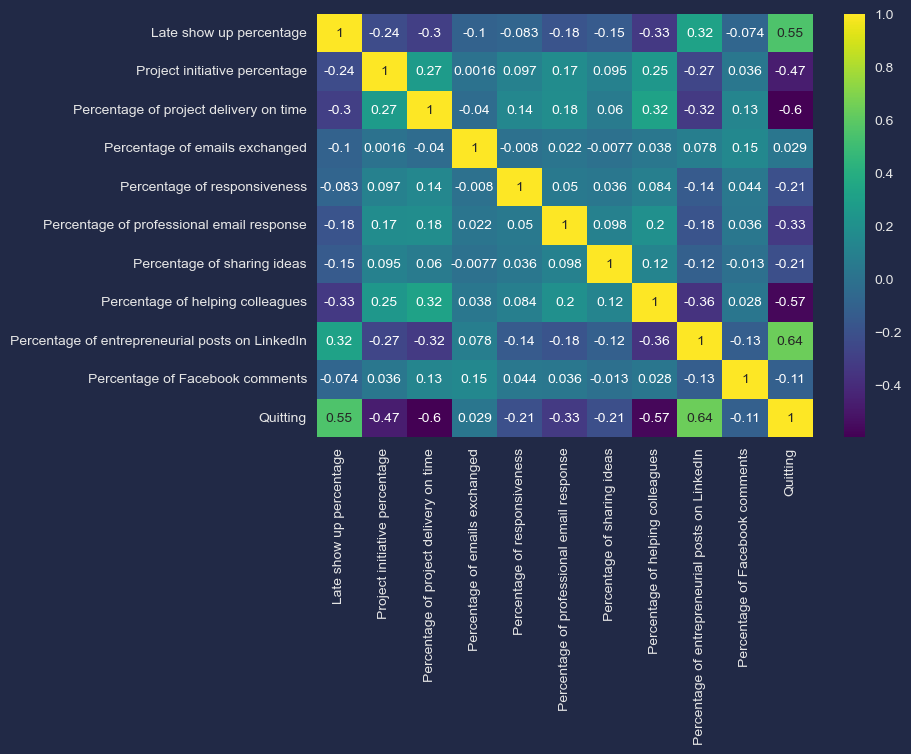

In [9]:
# remove colinear features
sns.heatmap(df.corr() , annot=True, cmap="viridis")


# Modeling Step:

## Scaling the data 

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scalar = MinMaxScaler()
# fitting 
scalar.fit(df)
df_scaled = scalar.transform(df)
df_scaled = pd.DataFrame(df_scaled,columns = df.columns)
df_scaled

,Late show up percentage,Project initiative percentage,Percentage of project delivery on time,Percentage of emails exchanged,Percentage of responsiveness,Percentage of professional email response,Percentage of sharing ideas,Percentage of helping colleagues,Percentage of entrepreneurial posts on LinkedIn,Percentage of Facebook comments,Quitting
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767,1.0
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091,0.0
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970,0.0
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326,1.0
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463,1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.540622,0.425615,0.439613,0.363198,0.540406,0.230579,0.318439,0.013646,0.494684,0.565135,1.0
996,0.259226,0.369436,0.496785,0.470391,0.823357,0.717082,0.536417,0.278421,0.390341,0.816257,0.0
997,0.621092,0.388595,0.393724,0.548295,0.438829,0.443107,0.064574,0.060641,0.364369,0.594624,1.0
998,0.588408,0.301913,0.152232,0.390393,0.968955,0.485200,0.395298,0.512713,0.599986,0.437207,1.0


## Spliting the data 

In [12]:
# import train test split
from sklearn.model_selection import train_test_split

In [13]:
# splitting the data
X = df.drop(columns=["Quitting"])
y= df["Quitting"]


In [14]:
X_train, X_test , y_train, y_test = train_test_split( X , y, test_size=.3)

In [15]:
# show the length of each
len(X_train) , len(X_test)

(700, 300)

## Build the model

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# import linearregression model
lg = LogisticRegression()
# fitting 
lg.fit(X_train, y_train)

LogisticRegression()

In [18]:
# predict the x_test
y_pred = lg.predict(X_test)

In [19]:
# have a look at the parameters
pd.Series(lg.coef_[0],index=X.columns,name="coefficents").to_frame()


,coefficents
Late show up percentage,3.709653
Project initiative percentage,-2.958275
Percentage of project delivery on time,-4.564991
Percentage of emails exchanged,0.140087
Percentage of responsiveness,-0.974659
Percentage of professional email response,-1.855249
Percentage of sharing ideas,-1.414510
Percentage of helping colleagues,-3.574268
Percentage of entrepreneurial posts on LinkedIn,5.560011
Percentage of Facebook comments,-0.544232


## Evaluate the model

In [20]:
from sklearn.metrics import accuracy_score , classification_report

In [21]:
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy = {acc*100}")

Accuracy = 94.33333333333334


In [22]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

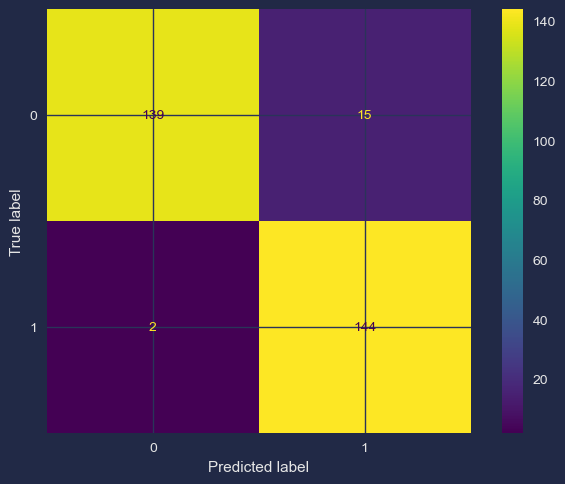

In [23]:
cm = confusion_matrix(y_test,y_pred,labels= lg.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=lg.classes_)
cmd.plot();

In [24]:
lg.classes_

array([0, 1], dtype=int64)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       154
           1       0.91      0.99      0.94       146

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.94      0.94       300



In [30]:
lg.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0], d

In [33]:
(lg.predict_proba(X_test)[:,1] > .8).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [35]:
from ipywidgets import interact , FloatSlider

In [37]:
@interact
def show_metrics( thre = FloatSlider(min=.1, max=.9, step=.1)):
    predicted_labels = (lg.predict_proba(X_test)[:,1] >thre ).astype(int)
    print(classification_report(y_test ,predicted_labels))
    cm = confusion_matrix(y_test,predicted_labels,labels= lg.classes_)
    cmd = ConfusionMatrixDisplay(cm, display_labels=lg.classes_)
    cmd.plot();
    
    

interactive(children=(FloatSlider(value=0.1, description='thre', max=0.9, min=0.1), Output()), _dom_classes=('…